### Iris Dataset
Here, there are 150 iris plants with 4 numeric attributes. They are sepal length, sepal width, petal length, petal width. Task is to predict each plant as iris-setosa, iris-versicolor, or an iris-virginica based on attributes.

In [ ]:
import pandas as pd
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

print(iris.shape)
iris.head()

(150, 6)


,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


Here, column id is same as row index. We can drop that. 

In [ ]:
iris.drop('id', axis=1, inplace=True)
iris.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


Now, let's see the summary stats

In [ ]:
import pandas as pd
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.describe()

,id,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


All 4 features are numeric. There are no missing values. This is a clean dataset.<br>
Here, we skip standadization since ranges of attributes are of similar magnitude.<br>
However, standadization (feature scaling) is a important preprocessing step. For more info: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

### Class Distribution
This dataset has 3 classes of 50 instances each

In [ ]:
import pandas as pd
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.groupby('species').size()

species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64

We can also use value_counts()

In [ ]:
import pandas as pd
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris['species'].value_counts()

iris-setosa        50
iris-versicolor    50
iris-virginica     50
Name: species, dtype: int64

This dataset is balanced. When a database is imbalanced a different analysis is used. For more details: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

### Univariate Plot
To better understand each variable, plot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.hist()
plt.show()

This gives much better idea about data distribution. 

### Multivariate Plot
To see interactions between attributes, we use scatter plots.

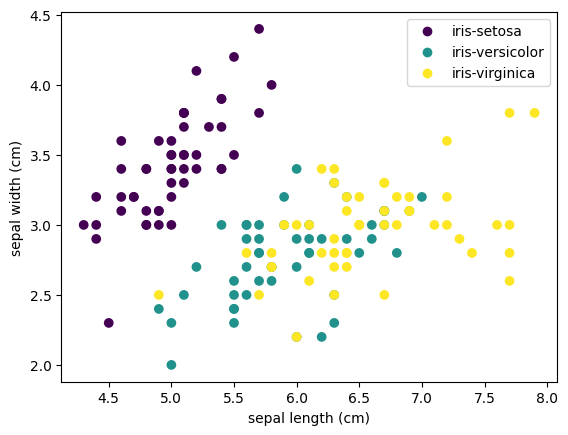

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

# build a dict mapping species to an integer code
inv_name_dict = {'iris-setosa': 0, 'iris-versicolor': 1, 'iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]

# scatter plot
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c = colors)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

## add legend
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.savefig("plot.png")
plt.show()

This is plotted using sepal length and sepal width. Similarly, we can use petal length and petal width

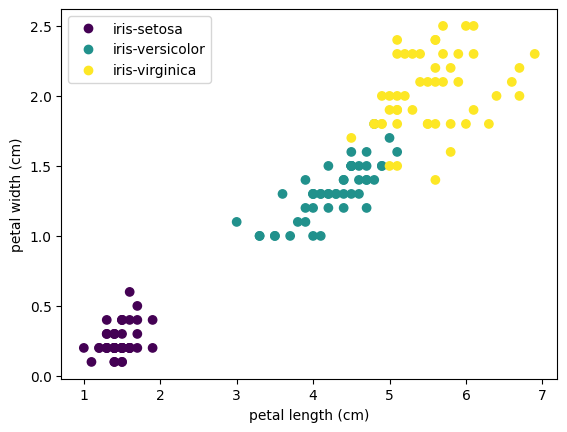

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

# build a dict mapping species to an integer code
inv_name_dict = {'iris-setosa': 0, 'iris-versicolor': 1, 'iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]

# scatter plot
scatter = plt.scatter(iris['petal_len'], iris['petal_wd'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# add legend
plt.legend(handles= scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.savefig("plot.png")
plt.show()

To see scatter plots of all pairs of features, use pandas.plotting.scatter_matrix().

### K nearest neighnors (knn)
This is a supervised ML model. Here, model takes a data point, looks at its 'k' closest labeled data points, and assigns the label by a majority vote. Changing k could affect the output of the model. In knn, k is a hyperparameter (ML paramter which is set before the learning process begins).<br>
K nearest neightbours can also be used for regression problems. Instead of majority vote, knn for regression makes a prediction using mean labels of the k closest data points
 

### Data Preparation
Split is statified by label(y) to ensure the distribution of labels remains similar in both train and test sets

In [ ]:
import pandas as pd
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

iris-setosa        35
iris-virginica     35
iris-versicolor    35
Name: species, dtype: int64
iris-virginica     15
iris-setosa        15
iris-versicolor    15
Name: species, dtype: int64


In classifications, stratified sampling is often chosen to ensure train and test data sets have approx same percentage of samples of each target class as the complete set

### Modeling
Now, we can build and train the model knn. We set k = 5 by random choice

In [ ]:
import pandas as pd
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.neighbors import KNeighborsClassifier
## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
print(knn.fit(X_train, y_train))

KNeighborsClassifier()


Now, we have the trained model. We use most default values for parameters (Ex: metric = 'minkowski and p = 2, this means distance is euclidean distance)<br>
For more details: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### Label Prediction


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print(pred[:5])

['iris-virginica' 'iris-setosa' 'iris-setosa' 'iris-versicolor'
 'iris-versicolor']


Prediction is store in 1d array

### Probability Prediction
predict_prob method returns probability of target instead of splitting the label

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

y_pred_prob = knn.predict_proba(X_test)
print(y_pred_prob[10:12])

[[1.  0.  0. ]
 [0.  0.2 0.8]]


Ex: This means 11th flower (10th index) has 100% probabilty of being iris-setosa

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

y_pred_prob = knn.predict_proba(X_test)
print(pred[10:12])

['iris-setosa' 'iris-virginica']


Soft prediction returns probabilities while hard prediction returns labels

### Accuracy
Accuracy calculates the proportion of data points whose predicted labels exactly match the observed labels

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print((y_pred==y_test.values).sum())
print(y_test.size)

44
45


Therefore, the accuracy is 44/45. 

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print((y_pred==y_test.values).sum()/y_test.size)

0.9777777777777777


This is similar to below code where score method is used to evaluate


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  random_state=1, stratify=y)

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(knn.score(X_test, y_test))

0.9777777777777777


### Confusion Matrix
Classification accuracy can be misleading if there's an unequal number of observations in each class or if there's more than 2 classes in the dataset. <br>
Calculate confusion matrix to get a better idea about what erros the model is making<br>
Confusion matrix is a summary of counts of correct and incorrect predictions, broken down by each class. Use confusion_matrix() for this


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


We can visualize this


c:\Users\Dilshan (dp)\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


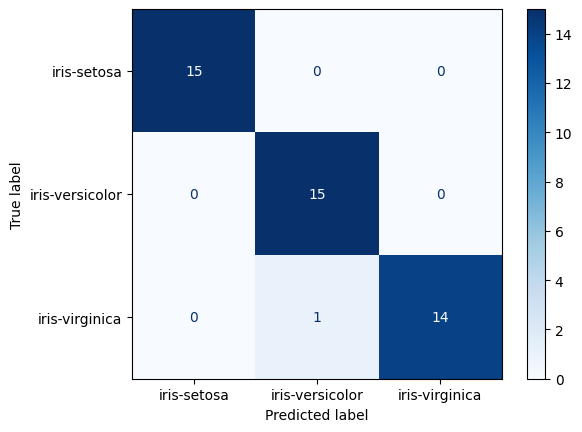

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)
## fit 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);
plt.savefig("plot.png")

Here, columns are predicted classes and rows are actual classes. 

### K-fold Cross Validation
Previously used splitting data for testing and training is called cross validation technique (holdout method). Since split is random, model performance can be sensitive to split. To overcome this, k-fold cross validation is used<br>
Here, data is divided into k subsets. Then holdout method is repeated k times. Each time  one subset is used to test and other k-1 subsets are combined to train the model. <br>
Then, the accuracy is averaged over k trials to provide total effectiveness of the model. This way, all data points are used. Since we have more metrics, we don't rely on one test data for model performance evaluation. <br>
Use cross_val_score to use k-fold cross validation is sklearn (Note: we are fitting 3nn model). Here, each holdout set contains 20% of the original data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.model_selection import cross_val_score

# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

# train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

# print each cv score (accuracy) 
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


Due to random assignments, the accuracies on holdsets fluctuates from 0.9 to 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.model_selection import cross_val_score

# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
# train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
# then average them
print(cv_scores.mean())

0.9533333333333334


3nn model has accuracy of 95.33% based on 5-fold cross validation. <br>
As k gets larger, the difference in size between training set and resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.

### Grid Search
We used hyperparameter k as 5 and 3 for k-fold cross validation. Finding the optimal k is called tuning the hyperparameter. <br>
In sklearn, we use GridSearchCV which trains our model multiple times on a range of values in param_grid parameter and computes cross validation score, so we can check which values for hyperparameter k performed the best<br>
To check top performing n_neighbors value


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  random_state=1, stratify=y)

from sklearn.model_selection import GridSearchCV

# create new a knn model
knn2 = KNeighborsClassifier()

# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)
print(knn_gscv.best_params_)

{'n_neighbors': 4}


So, 4 is the best value for n_neighbors. Let's find the accuracy when k is 4

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
print(knn_gscv.best_score_)

0.9666666666666668


Using grid search we found the optimal hyperparameter for the model. It improved the model accuracy by over 1%. Let's build the final model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

y_pred = knn_final.predict(X)
print(knn_final.score(X, y))

0.9733333333333334


Final model (4nn) has 97.33% accuracy in iris species prediction. This k-fold cross validation and tuning parameters with grid search is also applicable to regression problems

### Label Prediction with New Data
Now, we can deploy model knn_final. Use model.predict with petal length and width to make the prediction for new data.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  random_state=1, stratify=y)

from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

new_data = np.array([3.76, 1.20])
knn_final.predict(np.array(new_data))

c:\Users\Dilshan (dp)\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[3.76 1.2 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

This results in error because we trained the model with data in 2d dataframe. We should enter new data in 2d format.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

new_data = np.array([3.76, 1.20])
new_data = new_data.reshape(1, -1)
print(knn_final.predict(new_data))

['iris-versicolor']


c:\Users\Dilshan (dp)\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


model.predict can also take a 2d list (Ex: knn_final.predict([[3.76, 1.2]]))

### Probability Prediction with New Data
Here's a prediction for set of new data


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

new_data = np.array([[3.76, 1.2], 
                     [5.25, 1.2],
                     [1.58, 1.2]])
print(knn_final.predict(new_data))

['iris-versicolor' 'iris-virginica' 'iris-setosa']


c:\Users\Dilshan (dp)\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


We can find probabilities for each data point


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

new_data = np.array([[3.76, 1.2], 
                     [5.25, 1.2],
                     [1.58, 1.2]])
knn_final.predict(new_data)
print(knn_final.predict_proba(new_data))

[[0.   1.   0.  ]
 [0.   0.25 0.75]
 [1.   0.   0.  ]]


c:\Users\Dilshan (dp)\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dilshan (dp)\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
